In [1]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

%matplotlib inline

In [2]:
methods = {'No_deconv':'-o', 
           'FPFS':'-o',
           'Richard-Lucy(10)':':^', 'Richard-Lucy(20)':'-.^', 
           'Richard-Lucy(30)':'-^', 'Richard-Lucy(50)':'--^', 
         #   'Richard-Lucy(100)',
           'Unrolled_ADMM(1)':':^', 'Unrolled_ADMM(2)':'-.^', 
           'Unrolled_ADMM(4)':'-v', 'Unrolled_ADMM(8)':'--v'}
snrs = [5, 10, 20, 40, 60, 80, 100, 150, 200]

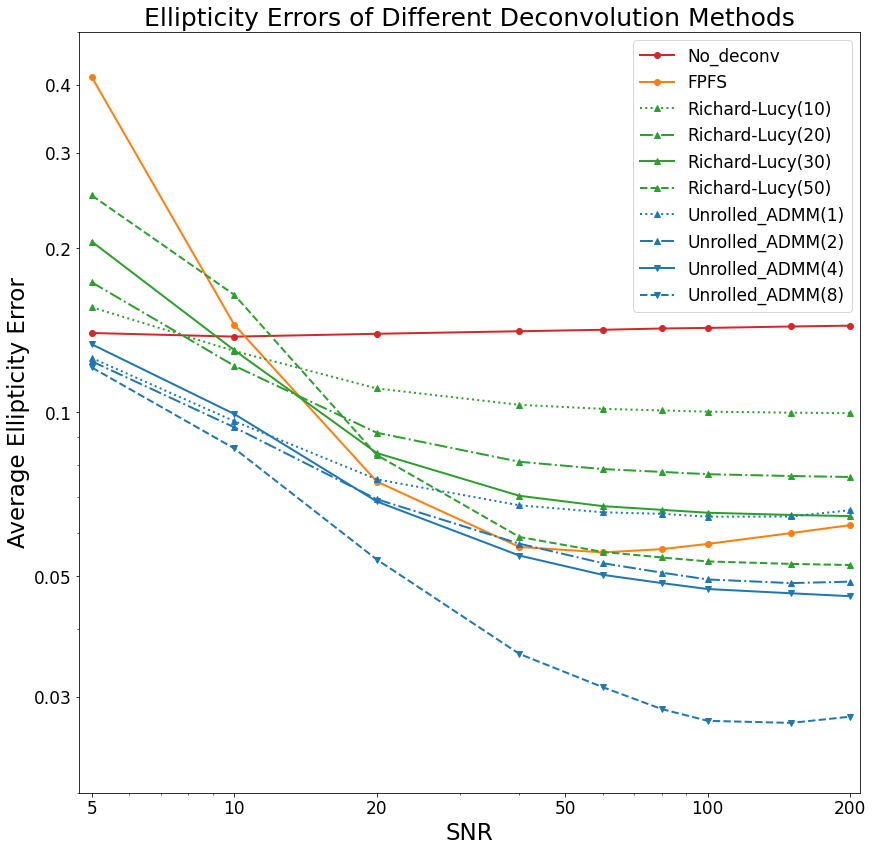

In [3]:
fig, ax1 = plt.subplots(figsize=(14,14), facecolor='white')

for method in methods:
    g_errs, g_stds = [], []
    results_file = os.path.join('results', method, f'results.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_deconv':
        gt_shear = np.array(results['20']['gt_shear'])
    results.pop('time')

    for snr in snrs:
        rec_err = np.abs(np.array(results[str(snr)]['rec_shear']) - gt_shear)
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))
    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    ax1.plot(snrs, g_errs, methods[method], label=method, color=color, linewidth=2)

ax1.set_ylim(0.02,0.5)
ax1.set_yscale('log', base=10)
ax1.set_yticks([0.03,0.05,0.1,0.2,0.3,0.4])
ax1.set_yticklabels(['0.03','0.05','0.1','0.2','0.3','0.4'])
ax1.set_ylabel('Average Ellipticity Error', fontsize=23)

ax1.set_xlim([4.7, 210])
ax1.set_xscale('log')
ax1.set_xticks([5,10,20,50,100,200])
ax1.set_xticklabels(['5','10','20','50','100','200'])
ax1.set_xlabel('SNR', fontsize=23)

plt.legend(fontsize=17)
plt.tick_params(labelsize=17)
plt.title('Ellipticity Errors of Different Deconvolution Methods', fontsize=25)
plt.savefig(os.path.join('figures', f'err_snr.jpg'), bbox_inches='tight')
plt.show()